In [1]:
import os
import sys
from time import time
import pickle
import logging
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

In [2]:
import numpy as np
import tensorflow as tf

from utils import *
from preprocessing import *
from kl_net import *
from wass_net import *
from evaluation import *

In [8]:
# vocab, vocab2id, vocab2prob, word_pairs = preprocess('./data/simple.wiki.small.txt')
with open('./data/vocab.pkl', 'rb') as infile:
    vocab = pickle.load(infile)
with open('./data/vocab2id.pkl', 'rb') as infile:
    vocab2id = pickle.load(infile)
with open('./data/pos_samples.pkl', 'rb') as infile:
    pos_samples = pickle.load(infile)
with open('./data/neg_samples.pkl', 'rb') as infile:
    neg_samples = pickle.load(infile)

logging.info("Load vocabulary and word pairs from local file.")

2019-05-20 21:09:18,382 - INFO - Load vocabulary and word pairs from local file.


In [4]:
file_name = 'WikiSmall'

# num_samples = 250000

# X_train = np.array(list(pos_samples)[:num_samples] + list(neg_samples)[:num_samples])
# y_train = np.array([1 for _ in range(num_samples)] + [0 for _ in range(num_samples)])

X_train = np.array(list(pos_samples) + list(neg_samples))
y_train = np.array([1 for _ in pos_samples] + [0 for _ in neg_samples])

X_train.shape, y_train.shape

((13091088, 2), (13091088,))

## Wasserstein

In [12]:
embed_dim = 16
ground_dim = 4
n_epochs = 1
batch_size = 2048
max_try = 1
m = 10
lambd = 0.5

In [9]:
# pre_trained_embeddings = np.load('./results/WikiSmall_WassR2_32_batch_2.npz')['embeddings']
# print(pre_trained_embeddings.shape)
pre_trained_embeddings = None
# Wass
logging.info("Running Wasserstein R{} embedding, embed dim={}".format(ground_dim, embed_dim))
try_count = 0
while try_count < max_try:
    try:
        embeddings, embed_distances = train_wass(X_train, y_train, vocab_size=len(vocab), 
                                            pre_trained_weights=pre_trained_embeddings, 
                                            dim=embed_dim, learning_rate=0.001, 
                                            n_epochs=n_epochs, 
                                            ground_dim=ground_dim, lambd=lambd, m=m,
                                            batch_size=batch_size)
        break
    except RuntimeError:
        logging.warning("Got loss NaN")
        try_count += 1
else:
    logging.warning("Fail.")

logging.info("Writing {}_WassR{}_{}_batch to local file".format(file_name, ground_dim, embed_dim))
np.savez('./results/{}_WassR{}_{}_batch'.format(file_name, ground_dim, embed_dim), 
         embeddings=embeddings, embed_distances=embed_distances)

2019-05-19 23:09:14,011 - INFO - Running Wasserstein R4 embedding, embed dim=16
2019-05-19 23:09:14,028 - INFO - Initialize embeddings by random.
/opt/miniconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-05-19 23:09:17,677 - INFO - Epoch No.1/1 - Batch No.1/6393 with 2048 samples: Loss 89313.9921875
2019-05-19 23:09:17,679 - INFO - Storing weights (embeddings)
2019-05-19 23:09:32,527 - INFO - Epoch No.1/1 - Batch No.11/6393 with 2048 samples: Loss 87473.1875
2019-05-19 23:09:46,846 - INFO - Epoch No.1/1 - Batch No.21/6393 with 2048 samples: Loss 89968.2109375
2019-05-19 23:10:02,005 - INFO - Epoch No.1/1 - Batch No.31/6393 with 2048 samples: Loss 87429.9609375
2019-05-19 23:10:17,227 - INFO - Epoch No.1/1 - Batch No.41/6393 with 2048 samples: Loss 90847.554

2019-05-19 23:33:01,115 - INFO - Epoch No.1/1 - Batch No.761/6393 with 2048 samples: Loss 76987.8359375
2019-05-19 23:33:22,975 - INFO - Epoch No.1/1 - Batch No.771/6393 with 2048 samples: Loss 75678.5703125
2019-05-19 23:33:43,964 - INFO - Epoch No.1/1 - Batch No.781/6393 with 2048 samples: Loss 75935.21875
2019-05-19 23:34:05,321 - INFO - Epoch No.1/1 - Batch No.791/6393 with 2048 samples: Loss 76502.96875
2019-05-19 23:34:25,288 - INFO - Epoch No.1/1 - Batch No.801/6393 with 2048 samples: Loss 75698.421875
2019-05-19 23:34:46,156 - INFO - Epoch No.1/1 - Batch No.811/6393 with 2048 samples: Loss 72941.96875
2019-05-19 23:35:06,510 - INFO - Epoch No.1/1 - Batch No.821/6393 with 2048 samples: Loss 73993.9296875
2019-05-19 23:35:26,598 - INFO - Epoch No.1/1 - Batch No.831/6393 with 2048 samples: Loss 74059.5625
2019-05-19 23:35:46,772 - INFO - Epoch No.1/1 - Batch No.841/6393 with 2048 samples: Loss 75328.5625
2019-05-19 23:36:07,096 - INFO - Epoch No.1/1 - Batch No.851/6393 with 2048 s

2019-05-20 00:00:53,556 - INFO - Epoch No.1/1 - Batch No.1551/6393 with 2048 samples: Loss 67976.1953125
2019-05-20 00:01:15,579 - INFO - Epoch No.1/1 - Batch No.1561/6393 with 2048 samples: Loss 66221.5546875
2019-05-20 00:01:37,621 - INFO - Epoch No.1/1 - Batch No.1571/6393 with 2048 samples: Loss 65680.265625
2019-05-20 00:01:59,570 - INFO - Epoch No.1/1 - Batch No.1581/6393 with 2048 samples: Loss 64860.2421875
2019-05-20 00:02:21,565 - INFO - Epoch No.1/1 - Batch No.1591/6393 with 2048 samples: Loss 66449.765625
2019-05-20 00:02:43,622 - INFO - Epoch No.1/1 - Batch No.1601/6393 with 2048 samples: Loss 64024.46484375
2019-05-20 00:03:05,801 - INFO - Epoch No.1/1 - Batch No.1611/6393 with 2048 samples: Loss 65312.01171875
2019-05-20 00:03:27,907 - INFO - Epoch No.1/1 - Batch No.1621/6393 with 2048 samples: Loss 66374.265625
2019-05-20 00:03:50,007 - INFO - Epoch No.1/1 - Batch No.1631/6393 with 2048 samples: Loss 65091.21875
2019-05-20 00:04:12,167 - INFO - Epoch No.1/1 - Batch No.1

2019-05-20 00:34:24,233 - INFO - Epoch No.1/1 - Batch No.2331/6393 with 2048 samples: Loss 60496.046875
2019-05-20 00:34:58,487 - INFO - Epoch No.1/1 - Batch No.2341/6393 with 2048 samples: Loss 60783.58984375
2019-05-20 00:35:31,691 - INFO - Epoch No.1/1 - Batch No.2351/6393 with 2048 samples: Loss 60727.4140625
2019-05-20 00:36:03,434 - INFO - Epoch No.1/1 - Batch No.2361/6393 with 2048 samples: Loss 61646.99609375
2019-05-20 00:36:36,407 - INFO - Epoch No.1/1 - Batch No.2371/6393 with 2048 samples: Loss 58785.875
2019-05-20 00:37:09,212 - INFO - Epoch No.1/1 - Batch No.2381/6393 with 2048 samples: Loss 58841.6640625
2019-05-20 00:37:41,697 - INFO - Epoch No.1/1 - Batch No.2391/6393 with 2048 samples: Loss 59206.2421875
2019-05-20 00:38:13,988 - INFO - Epoch No.1/1 - Batch No.2401/6393 with 2048 samples: Loss 59748.140625
2019-05-20 00:38:45,961 - INFO - Epoch No.1/1 - Batch No.2411/6393 with 2048 samples: Loss 60381.453125
2019-05-20 00:39:18,354 - INFO - Epoch No.1/1 - Batch No.242

2019-05-20 01:13:47,558 - INFO - Epoch No.1/1 - Batch No.3111/6393 with 2048 samples: Loss 58274.0
2019-05-20 01:14:12,147 - INFO - Epoch No.1/1 - Batch No.3121/6393 with 2048 samples: Loss 55474.4296875
2019-05-20 01:14:36,470 - INFO - Epoch No.1/1 - Batch No.3131/6393 with 2048 samples: Loss 56659.23828125
2019-05-20 01:15:00,702 - INFO - Epoch No.1/1 - Batch No.3141/6393 with 2048 samples: Loss 56548.2421875
2019-05-20 01:15:25,073 - INFO - Epoch No.1/1 - Batch No.3151/6393 with 2048 samples: Loss 58254.4609375
2019-05-20 01:15:49,249 - INFO - Epoch No.1/1 - Batch No.3161/6393 with 2048 samples: Loss 56590.2109375
2019-05-20 01:16:13,656 - INFO - Epoch No.1/1 - Batch No.3171/6393 with 2048 samples: Loss 55594.5546875
2019-05-20 01:16:37,989 - INFO - Epoch No.1/1 - Batch No.3181/6393 with 2048 samples: Loss 57598.62109375
2019-05-20 01:17:02,330 - INFO - Epoch No.1/1 - Batch No.3191/6393 with 2048 samples: Loss 57261.234375
2019-05-20 01:17:26,622 - INFO - Epoch No.1/1 - Batch No.320

2019-05-20 01:46:14,364 - INFO - Epoch No.1/1 - Batch No.3901/6393 with 2048 samples: Loss 57027.5703125
2019-05-20 01:46:39,319 - INFO - Epoch No.1/1 - Batch No.3911/6393 with 2048 samples: Loss 55020.0390625
2019-05-20 01:47:04,124 - INFO - Epoch No.1/1 - Batch No.3921/6393 with 2048 samples: Loss 56071.859375
2019-05-20 01:47:29,097 - INFO - Epoch No.1/1 - Batch No.3931/6393 with 2048 samples: Loss 56943.3671875
2019-05-20 01:47:54,064 - INFO - Epoch No.1/1 - Batch No.3941/6393 with 2048 samples: Loss 54961.69921875
2019-05-20 01:48:19,069 - INFO - Epoch No.1/1 - Batch No.3951/6393 with 2048 samples: Loss 55590.578125
2019-05-20 01:48:44,063 - INFO - Epoch No.1/1 - Batch No.3961/6393 with 2048 samples: Loss 55176.71875
2019-05-20 01:49:08,933 - INFO - Epoch No.1/1 - Batch No.3971/6393 with 2048 samples: Loss 56273.8671875
2019-05-20 01:49:33,937 - INFO - Epoch No.1/1 - Batch No.3981/6393 with 2048 samples: Loss 55479.2421875
2019-05-20 01:49:58,873 - INFO - Epoch No.1/1 - Batch No.3

2019-05-20 02:19:06,490 - INFO - Epoch No.1/1 - Batch No.4681/6393 with 2048 samples: Loss 54774.58203125
2019-05-20 02:19:32,055 - INFO - Epoch No.1/1 - Batch No.4691/6393 with 2048 samples: Loss 54106.46875
2019-05-20 02:19:57,630 - INFO - Epoch No.1/1 - Batch No.4701/6393 with 2048 samples: Loss 54934.4296875
2019-05-20 02:20:23,419 - INFO - Epoch No.1/1 - Batch No.4711/6393 with 2048 samples: Loss 54538.87890625
2019-05-20 02:20:48,908 - INFO - Epoch No.1/1 - Batch No.4721/6393 with 2048 samples: Loss 54779.25
2019-05-20 02:21:14,407 - INFO - Epoch No.1/1 - Batch No.4731/6393 with 2048 samples: Loss 54419.48828125
2019-05-20 02:21:39,955 - INFO - Epoch No.1/1 - Batch No.4741/6393 with 2048 samples: Loss 54738.06640625
2019-05-20 02:22:05,492 - INFO - Epoch No.1/1 - Batch No.4751/6393 with 2048 samples: Loss 54492.7421875
2019-05-20 02:22:30,998 - INFO - Epoch No.1/1 - Batch No.4761/6393 with 2048 samples: Loss 54765.9609375
2019-05-20 02:22:56,567 - INFO - Epoch No.1/1 - Batch No.4

2019-05-20 02:52:40,169 - INFO - Epoch No.1/1 - Batch No.5461/6393 with 2048 samples: Loss 54152.30859375
2019-05-20 02:53:06,101 - INFO - Epoch No.1/1 - Batch No.5471/6393 with 2048 samples: Loss 53736.4921875
2019-05-20 02:53:32,041 - INFO - Epoch No.1/1 - Batch No.5481/6393 with 2048 samples: Loss 53042.91796875
2019-05-20 02:53:58,055 - INFO - Epoch No.1/1 - Batch No.5491/6393 with 2048 samples: Loss 53248.6328125
2019-05-20 02:54:23,959 - INFO - Epoch No.1/1 - Batch No.5501/6393 with 2048 samples: Loss 53320.04296875
2019-05-20 02:54:49,933 - INFO - Epoch No.1/1 - Batch No.5511/6393 with 2048 samples: Loss 53114.015625
2019-05-20 02:55:16,104 - INFO - Epoch No.1/1 - Batch No.5521/6393 with 2048 samples: Loss 53344.0234375
2019-05-20 02:55:42,209 - INFO - Epoch No.1/1 - Batch No.5531/6393 with 2048 samples: Loss 54365.00390625
2019-05-20 02:56:08,296 - INFO - Epoch No.1/1 - Batch No.5541/6393 with 2048 samples: Loss 53576.15234375
2019-05-20 02:56:34,279 - INFO - Epoch No.1/1 - Bat

2019-05-20 03:26:52,834 - INFO - Epoch No.1/1 - Batch No.6241/6393 with 2048 samples: Loss 53496.34375
2019-05-20 03:27:19,241 - INFO - Epoch No.1/1 - Batch No.6251/6393 with 2048 samples: Loss 52059.68359375
2019-05-20 03:27:45,570 - INFO - Epoch No.1/1 - Batch No.6261/6393 with 2048 samples: Loss 53707.4375
2019-05-20 03:28:13,538 - INFO - Epoch No.1/1 - Batch No.6271/6393 with 2048 samples: Loss 53354.3125
2019-05-20 03:28:40,033 - INFO - Epoch No.1/1 - Batch No.6281/6393 with 2048 samples: Loss 53010.171875
2019-05-20 03:29:06,612 - INFO - Epoch No.1/1 - Batch No.6291/6393 with 2048 samples: Loss 51670.78125
2019-05-20 03:29:32,963 - INFO - Epoch No.1/1 - Batch No.6301/6393 with 2048 samples: Loss 52416.4296875
2019-05-20 03:29:59,336 - INFO - Epoch No.1/1 - Batch No.6311/6393 with 2048 samples: Loss 52997.171875
2019-05-20 03:30:26,128 - INFO - Epoch No.1/1 - Batch No.6321/6393 with 2048 samples: Loss 53781.6640625
2019-05-20 03:30:52,572 - INFO - Epoch No.1/1 - Batch No.6331/6393

In [5]:
word_pairs_test, true_sim = read_ground_truth('./data/wordsim353.csv')
word_pairs_test = list(word_pairs_test)

In [9]:
X_test = [[vocab2id.get(w1), vocab2id.get(w2), sim] for (w1, w2), sim in zip(word_pairs_test, true_sim)]
X_test = [[w1, w2, sim] for w1, w2, sim in X_test if w1 is not None and w2 is not None]
true_sim = np.array([sim for _, _, sim in X_test])
X_test = np.array([[w1, w2] for w1, w2, _ in X_test])

In [10]:
X_test.shape, true_sim.shape

((225, 2), (225,))

In [3]:
embeddings = np.load('./results/WikiSmall_WassR4_16_batch.npz')['embeddings']

In [14]:
pred_sim = predict_wass(X_test, embeddings, vocab_size=len(vocab), dim=embed_dim, ground_dim=ground_dim)
spearman_rank = spearman_rank_correlation(true_sim, pred_sim)

In [15]:
spearman_rank

-0.08126106194690275

## KL

In [17]:
del embeddings

In [16]:
# vocab, vocab2id, vocab2prob, word_pairs = preprocess('./data/simple.wiki.small.txt')
with open('./data/vocab_large.pkl', 'rb') as infile:
    vocab = pickle.load(infile)
with open('./data/vocab2id_large.pkl', 'rb') as infile:
    vocab2id = pickle.load(infile)
with open('./data/pos_samples_large.pkl', 'rb') as infile:
    pos_samples = pickle.load(infile)
with open('./data/neg_samples_large.pkl', 'rb') as infile:
    neg_samples = pickle.load(infile)

logging.info("Load vocabulary and word pairs from local file.")

2019-05-20 21:12:39,373 - INFO - Load vocabulary and word pairs from local file.


In [ ]:
file_name = 'WikiLarge'

# num_samples = 250000

# X_train = np.array(list(pos_samples)[:num_samples] + list(neg_samples)[:num_samples])
# y_train = np.array([1 for _ in range(num_samples)] + [0 for _ in range(num_samples)])

X_train = np.array(list(pos_samples) + list(neg_samples))
y_train = np.array([1 for _ in pos_samples] + [0 for _ in neg_samples])

X_train.shape, y_train.shape

In [ ]:
len(vocab)

In [17]:
lr = 0.001
embed_dim = 300
n_epochs = 1
batch_size = 2048
max_try = 1
m = 10

In [ ]:
# pre_trained_embeddings = np.load('./tmp/KL_64_1000.npz')['embeddings']
# pre_trained_embeddings = np.load('./results/WikiSmall_KL_300_batch_0.npz')['embeddings']
# print(pre_trained_embeddings.shape)
pre_trained_embeddings = None
# KL
logging.info("Running KL embedding, embed dim={}".format(embed_dim))
try_count = 0
while try_count < max_try:
    try:
        embeddings, embed_distances = train_kl(X_train, y_train, vocab_size=len(vocab), 
                                            pre_trained_weights=pre_trained_embeddings, 
                                            dim=embed_dim, learning_rate=lr, 
                                            n_epochs=n_epochs, m=m,
                                            batch_size=batch_size)
        break
    except RuntimeError:
        logging.warning("Got loss NaN")
        try_count += 1
else:
    logging.warning("Fail.")

logging.info("Writing {}_{}_{}_batch to local file".format(file_name, 'KL', embed_dim))
np.savez('./results/{}_{}_{}_batch'.format(file_name, 'KL', embed_dim), embeddings=embeddings, embed_distances=embed_distances)

2019-05-20 09:18:20,839 - INFO - Running KL embedding, embed dim=300
2019-05-20 09:18:21,107 - INFO - Initialize embeddings by random.


In [ ]:
word_pairs_test, true_sim = read_ground_truth('./data/wordsim353.csv')
word_pairs_test = list(word_pairs_test)

In [ ]:
X_test = [[vocab2id.get(w1), vocab2id.get(w2), sim] for (w1, w2), sim in zip(word_pairs_test, true_sim)]
X_test = [[w1, w2, sim] for w1, w2, sim in X_test if w1 is not None and w2 is not None]
true_sim = np.array([sim for _, _, sim in X_test])
X_test = np.array([[w1, w2] for w1, w2, _ in X_test])

In [ ]:
X_test.shape, true_sim.shape

In [ ]:
pred_sim = predict_kl(X_test, embeddings, vocab_size=len(vocab), dim=embed_dim)
spearman_rank = spearman_rank_correlation(true_sim, pred_sim)

In [ ]:
spearman_rank

## try cosine similarity

In [100]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [105]:
cos_sim = np.array([10-cosine_distances(embeddings[[x1]], embeddings[[x2]]).item() for x1, x2 in X_test])

In [107]:
spearman_rank_correlation(true_sim, 10-cos_sim)

0.29671934260429833

In [108]:
import matplotlib.pyplot as plt

%matplotlib inline

In [109]:
list(zip(true_sim, cos_sim))

[(6.77, 9.524176001548767),
 (7.35, 9.443711280822754),
 (10.0, 10.0),
 (7.46, 9.15794551372528),
 (7.62, 9.413616180419922),
 (7.58, 9.410495638847351),
 (5.77, 9.301429331302643),
 (6.31, 9.321494162082672),
 (7.5, 9.46108341217041),
 (6.77, 9.677397966384888),
 (7.42, 9.417574882507324),
 (6.85, 9.50902658700943),
 (6.19, 9.570498824119568),
 (7.0, 9.562923014163971),
 (6.62, 9.286070704460144),
 (6.81, 9.286625742912292),
 (4.62, 9.256819367408752),
 (7.08, 9.259633004665375),
 (8.08, 9.481881558895111),
 (1.62, 9.358945310115814),
 (1.31, 9.329575061798096),
 (1.81, 9.38742709159851),
 (6.69, 9.504011273384094),
 (3.73, 9.112886428833008),
 (0.92, 9.13859474658966),
 (7.46, 9.206536054611206),
 (8.12, 9.050595998764038),
 (7.73, 9.431883871555328),
 (9.15, 9.283392429351807),
 (8.58, 9.532412230968475),
 (8.46, 9.359346866607666),
 (7.65, 9.238998532295227),
 (1.62, 9.414578378200531),
 (9.03, 9.597436606884003),
 (6.81, 9.65136170387268),
 (6.63, 9.44888961315155),
 (8.38, 8.9623

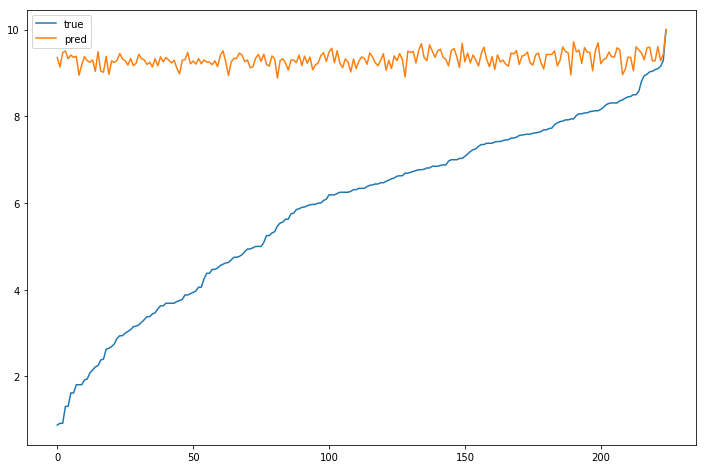

In [110]:
plt.figure(figsize=(12,8))
plt.plot(true_sim[np.argsort(true_sim)], label='true')
plt.plot(cos_sim[np.argsort(true_sim)], label='pred')
plt.legend()